# Employee Attrition Project

#### The project focuses on analysing the Employee data to understand the factors leading to attrition. The process involves following steps:


*  Business Requirement Understanding
*  Data Exploration & Visualization
*  Data Prepartion
*  Machine Learning Models
*  Neural Network Model



In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You will need to mount your drive using the following commands:

from google.colab import drive
drive.mount('/content/drive')

## Reading dataset
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Human_Resources.csv')

Mounted at /content/drive


## Dataset Exploration

In [3]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [4]:
print(df.shape)
print ("\n")
print(df.info())
print ("\n")
print(df.describe())

(1470, 35)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel   

In [5]:
## Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
## Converting Yes/No to 1/0

from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()

df['Attrition']=lb.fit_transform(df['Attrition'])
df['OverTime']=lb.fit_transform(df['OverTime'])
df['Over18']=lb.fit_transform(df['Over18'])

## Data Visualization

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

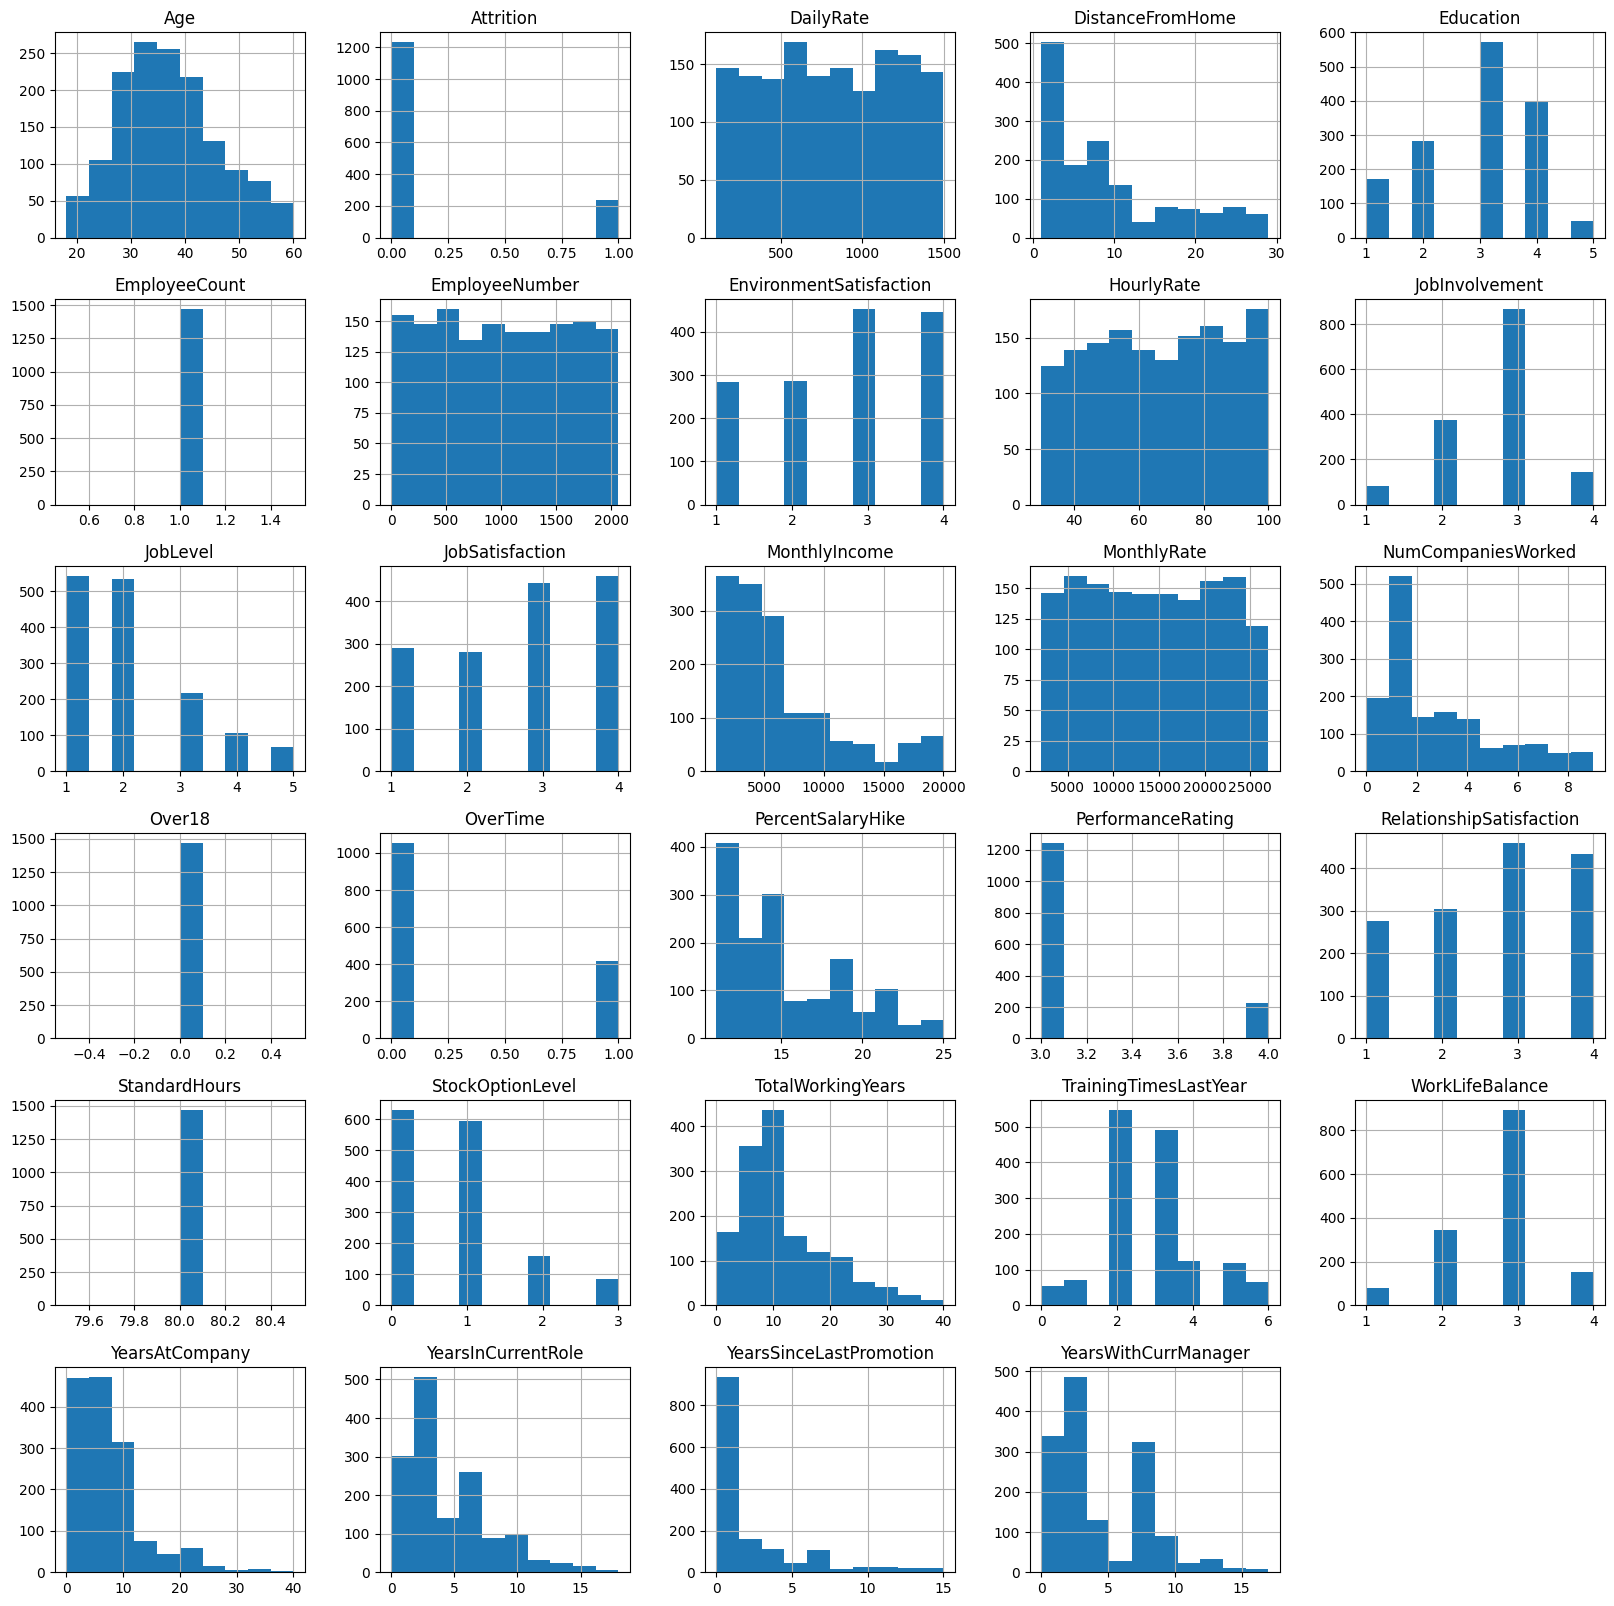

In [7]:
df.hist(figsize=(20,20))

In [8]:
### EmployeeCount, Over18, StandardHours and EmployeeNumber doesn't change for employees so we can drop them.

df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In [9]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

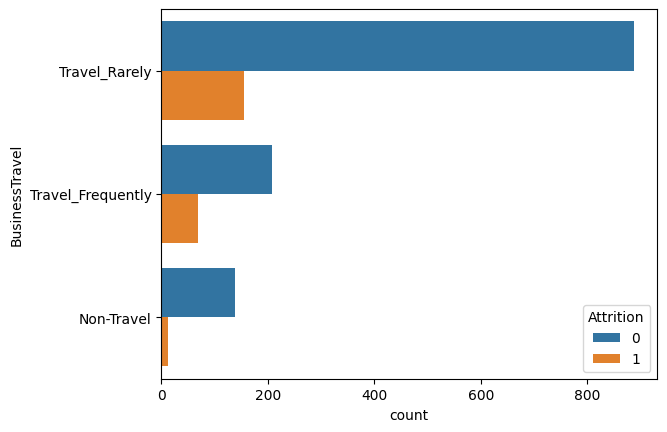

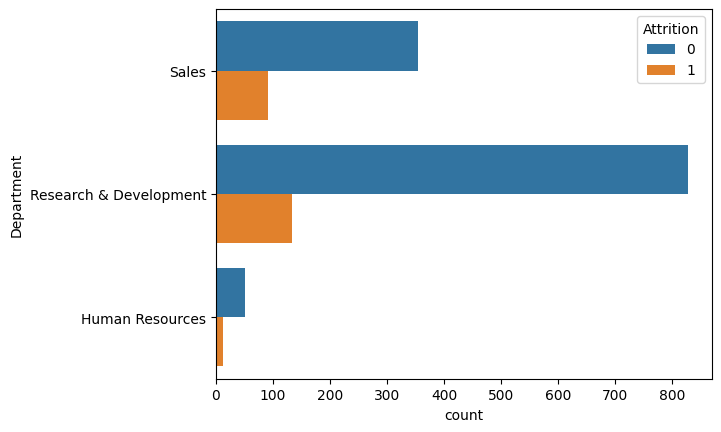

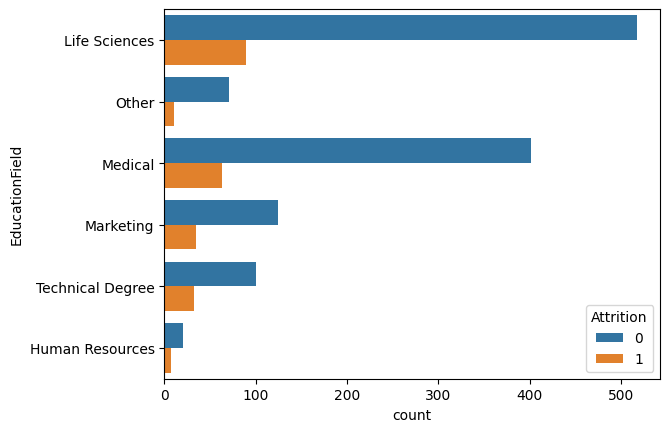

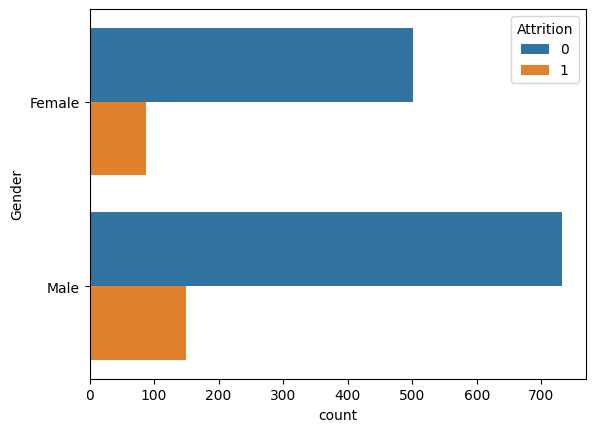

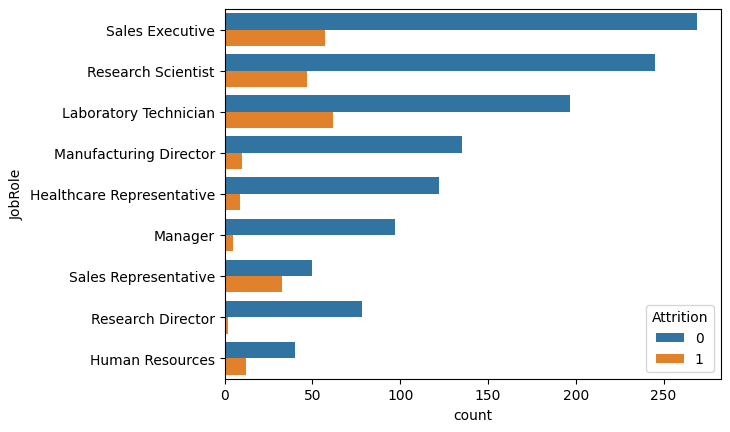

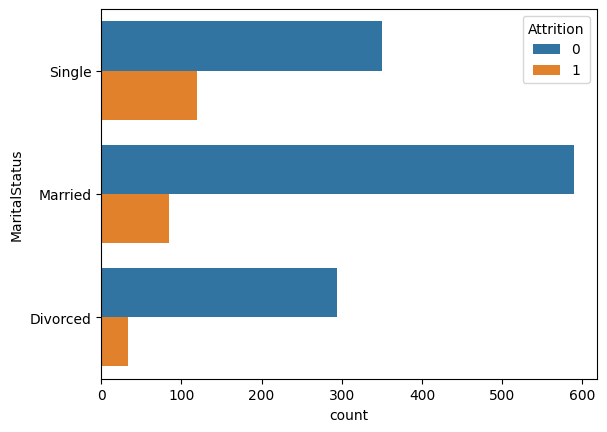

In [10]:

cat_cols=df.select_dtypes(['object']).columns.tolist()

for i in cat_cols:
  sns.countplot(data=df,y=i,hue='Attrition')
  plt.show()

In [11]:
# for i in cat_cols:
#     #print (df.groupby(['Attrition',i]).Age.count())
#     print (df.pivot_table(index='Attrition',columns=i,values='Age',aggfunc='count'))
#     print ("\n")

### Observations
* Single marital status have more attrition then divorced and married
* Sales Representative have the highest attrition.


<ipython-input-12-e6b9f9063542>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,ax=ax)


<Axes: >

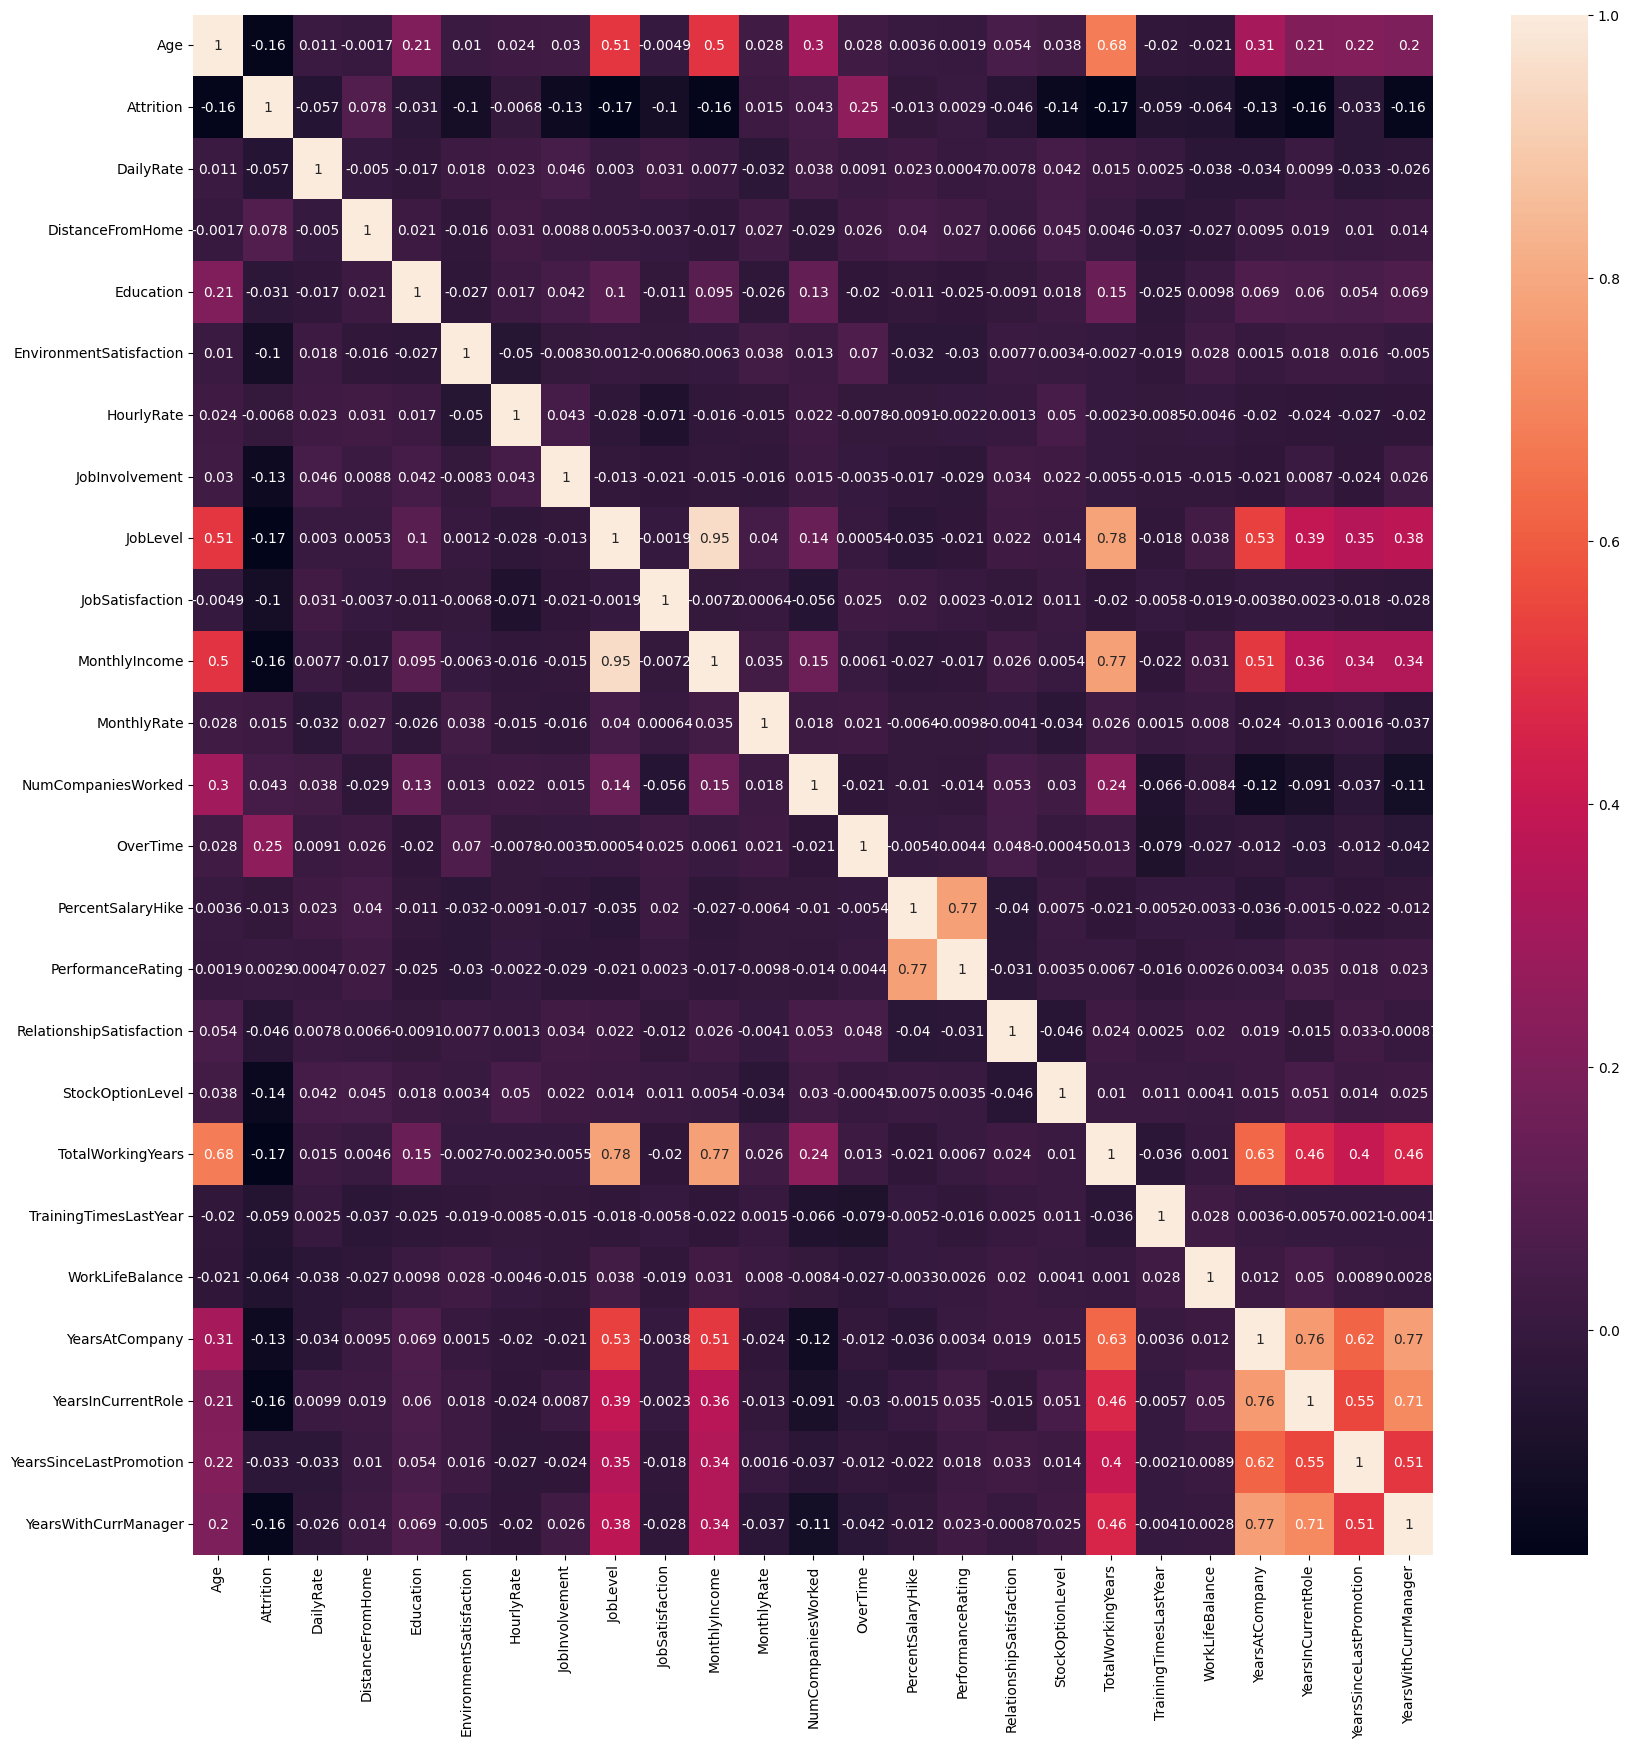

In [12]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [13]:
## Finding highly correlated variables
corr_matrix=df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

<ipython-input-13-64a004ad7b1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()
<ipython-input-13-64a004ad7b1a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['MonthlyIncome']

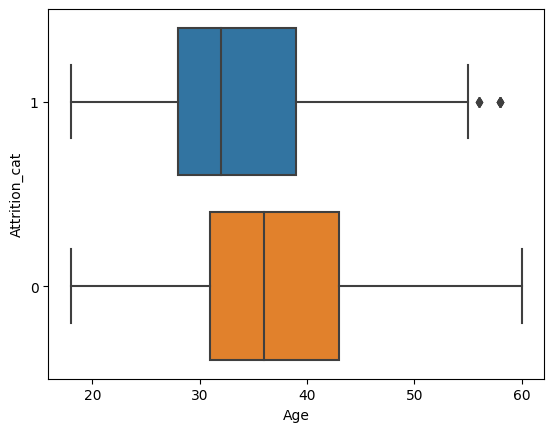

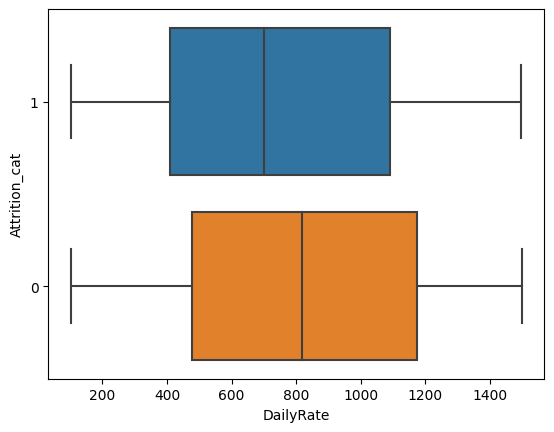

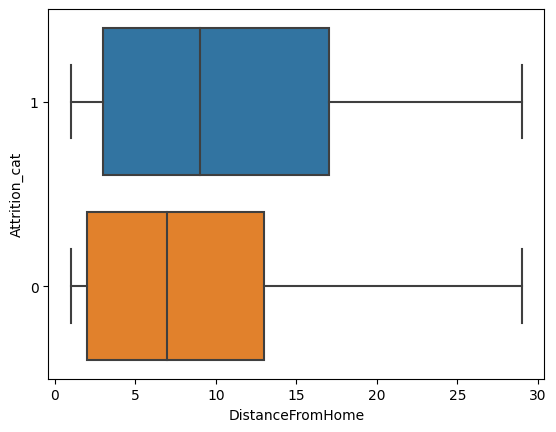

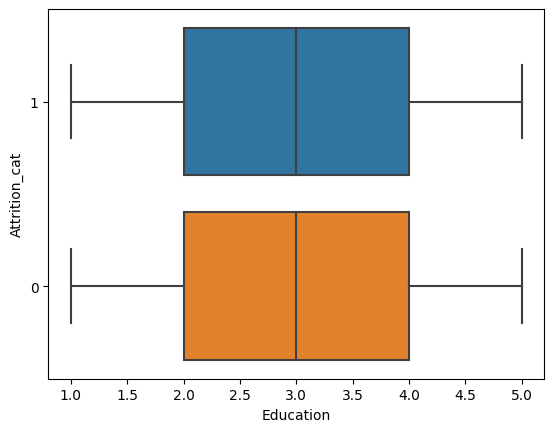

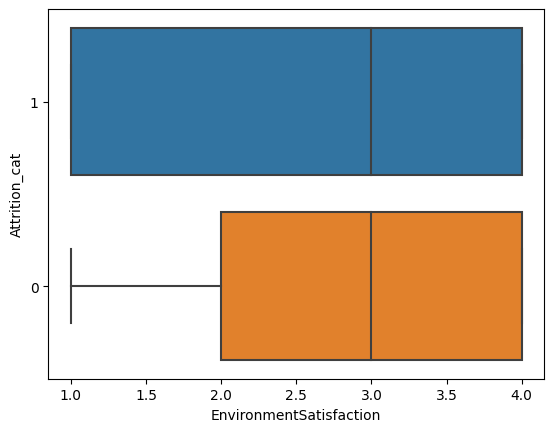

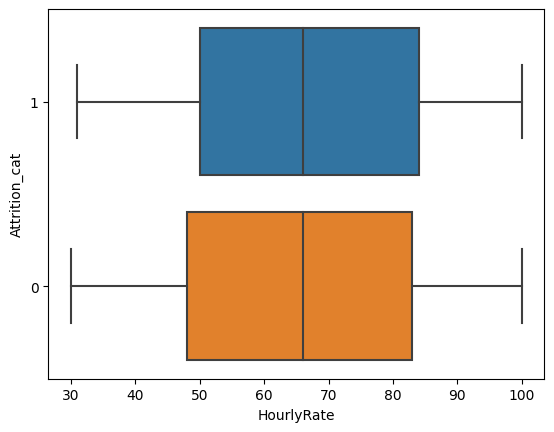

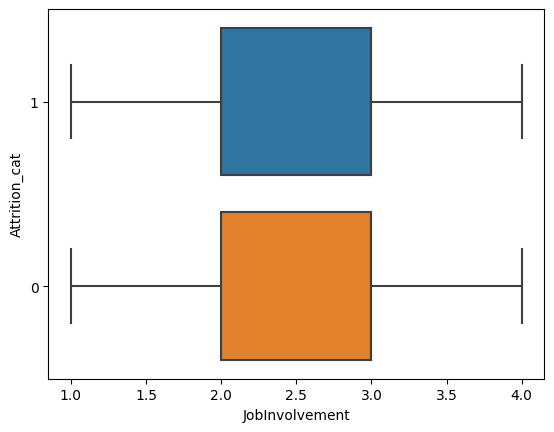

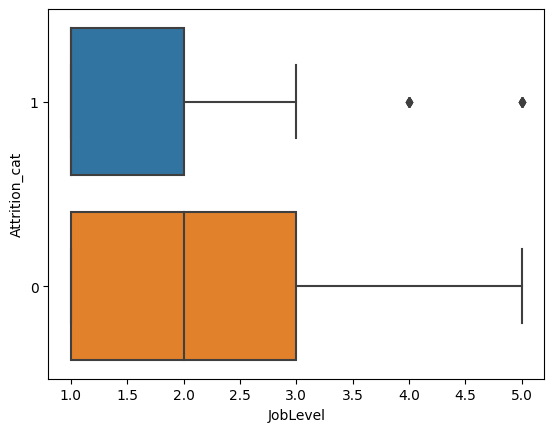

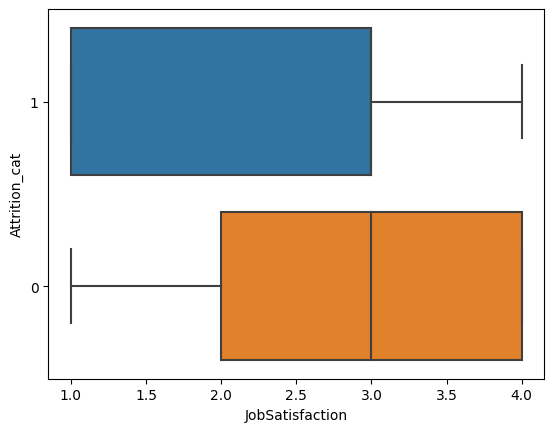

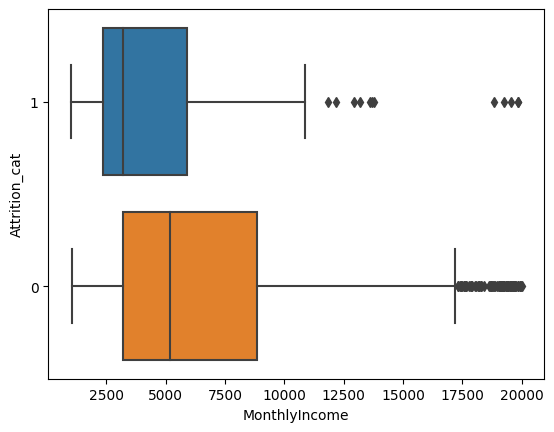

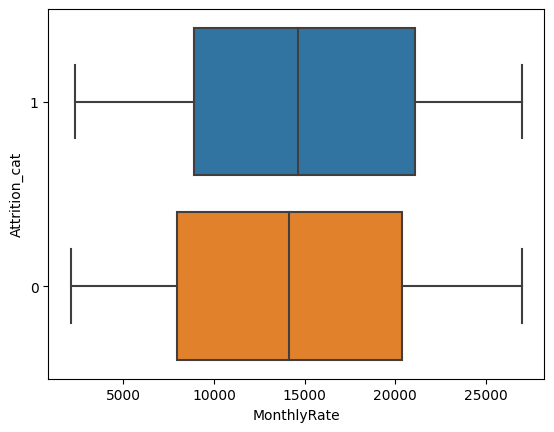

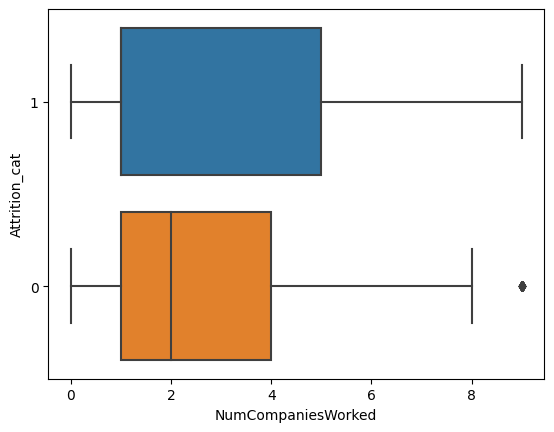

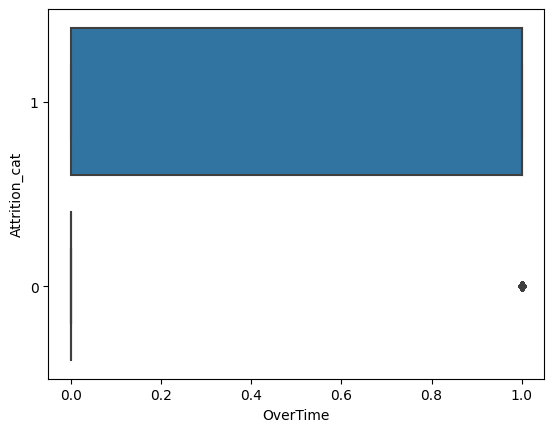

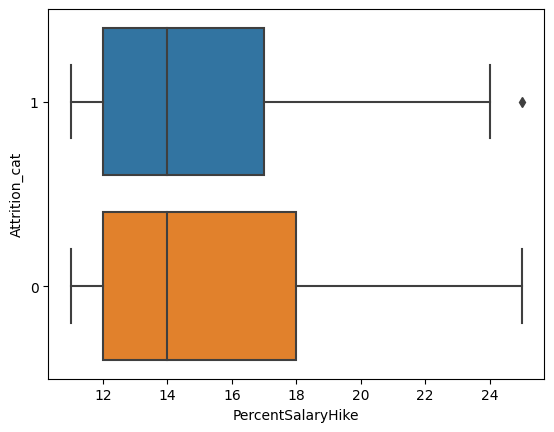

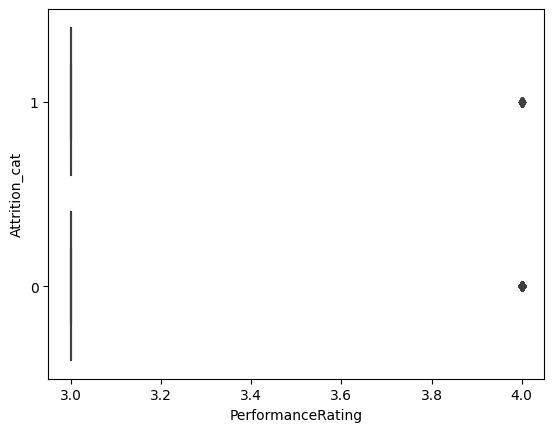

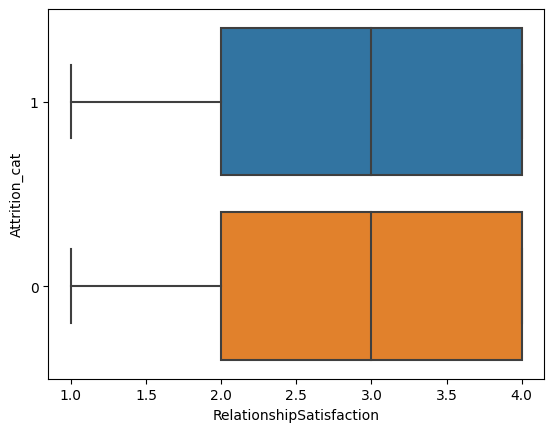

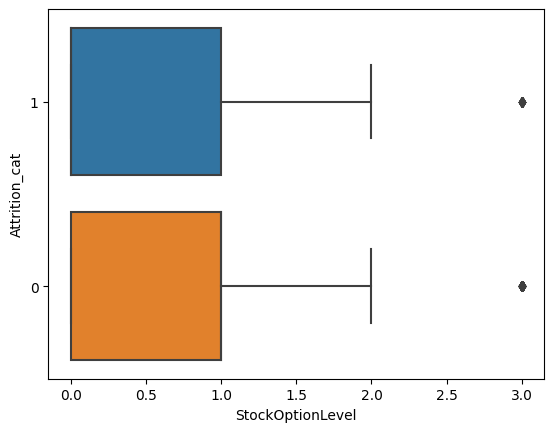

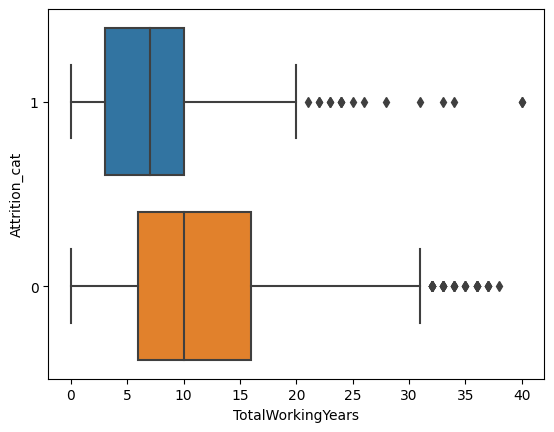

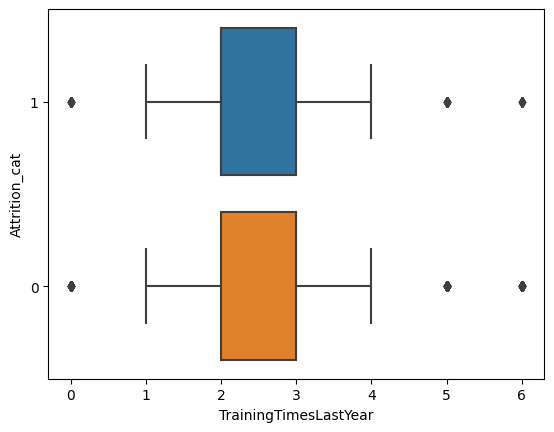

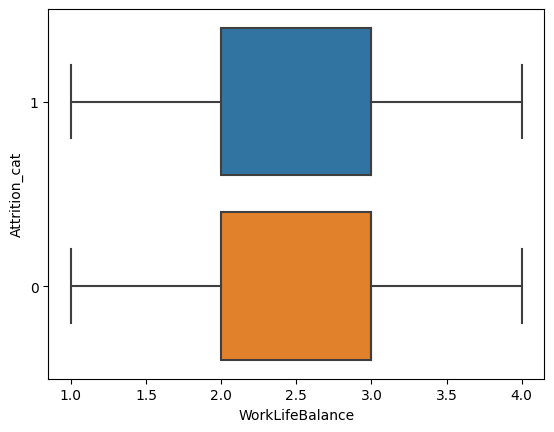

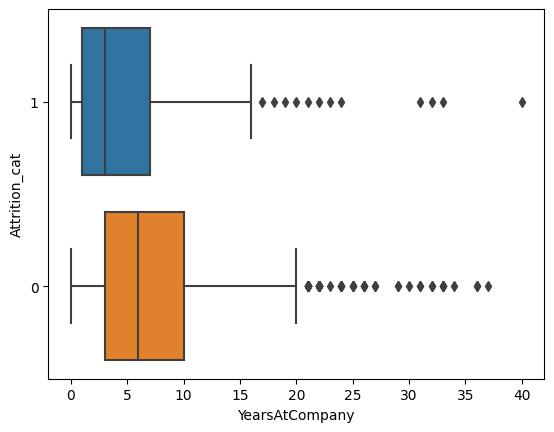

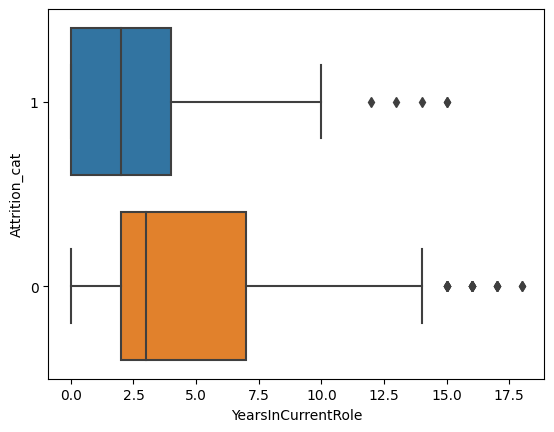

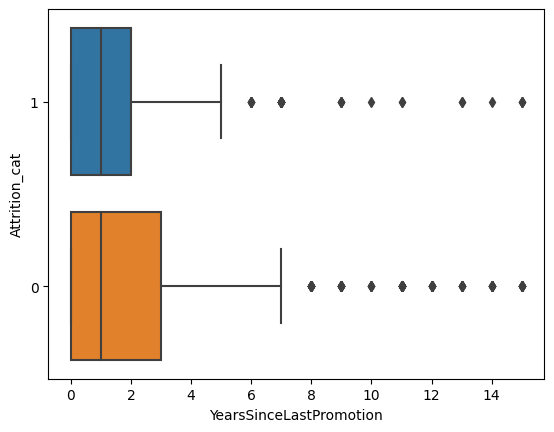

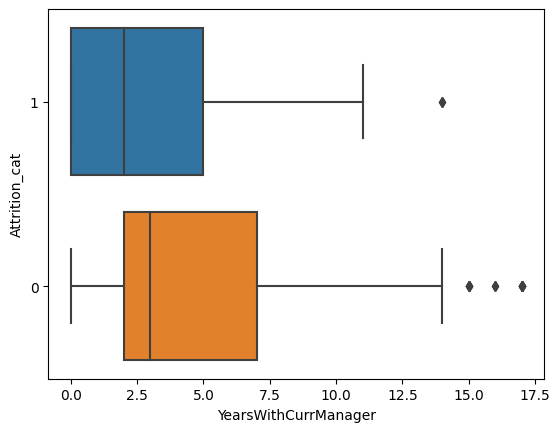

In [14]:
numerical_cols=df.select_dtypes('int').columns.tolist()
numerical_cols.remove('Attrition')
df['Attrition_cat']=df['Attrition'].astype('string')
for col in numerical_cols:
  sns.boxplot(data=df,x=col,y='Attrition_cat')
  plt.show()

### Observations
* Less involved employees tend to leave the company
* Less experienced (low job level) tend to leave the company

In [15]:
# fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 4))

# for i, col in enumerate(numerical_cols[:-1]):
#     sns.boxplot(y='Attrition_cat', x=col, data=df, ax=axes[i])
#     axes[i].set_title(f'Boxplot for {col}')

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


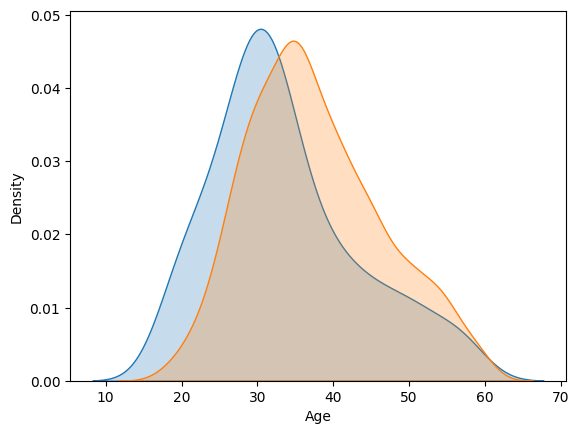

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


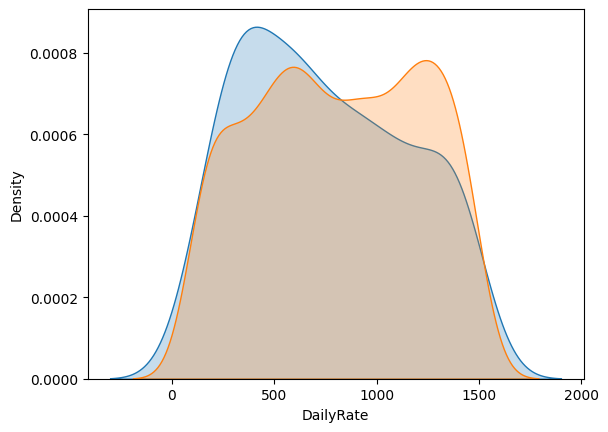

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


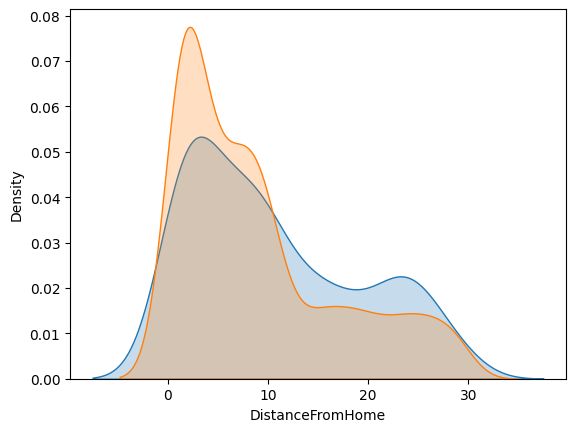

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


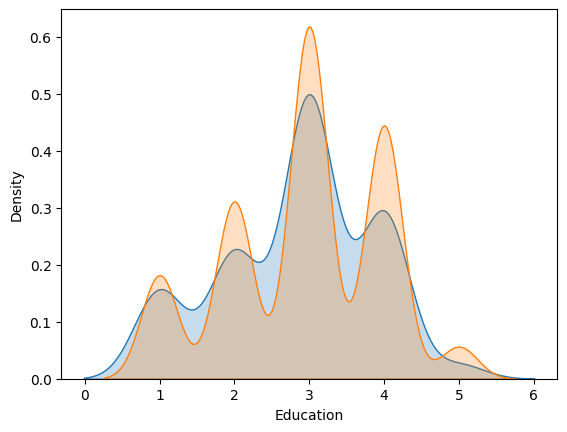

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


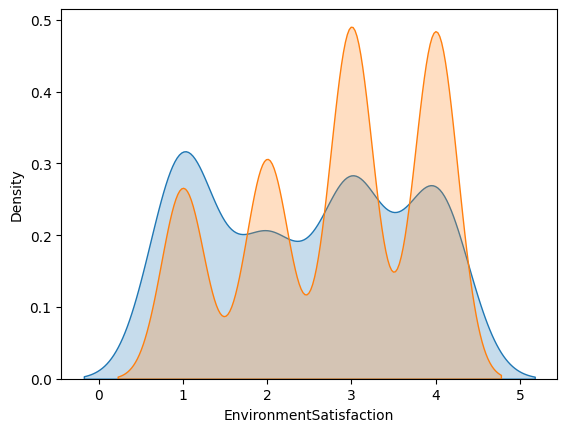

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


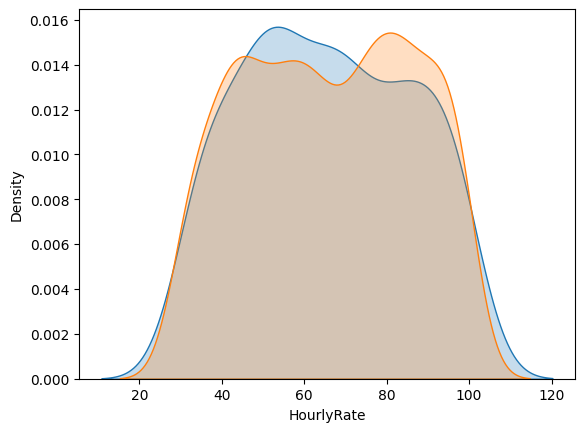

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


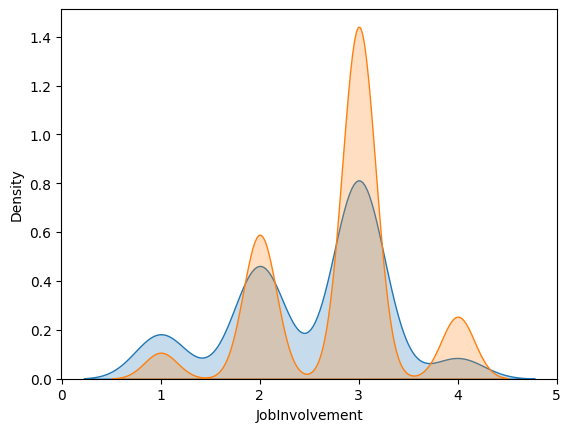

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


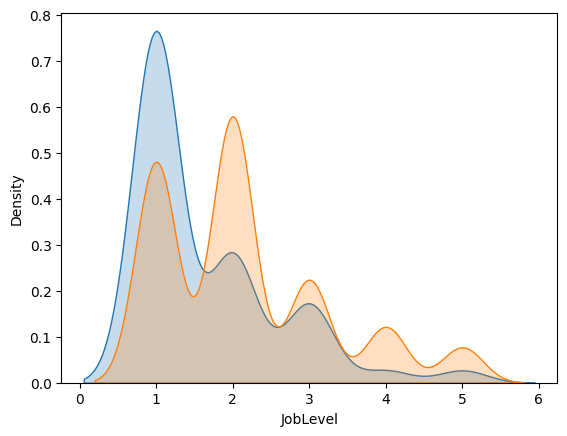

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


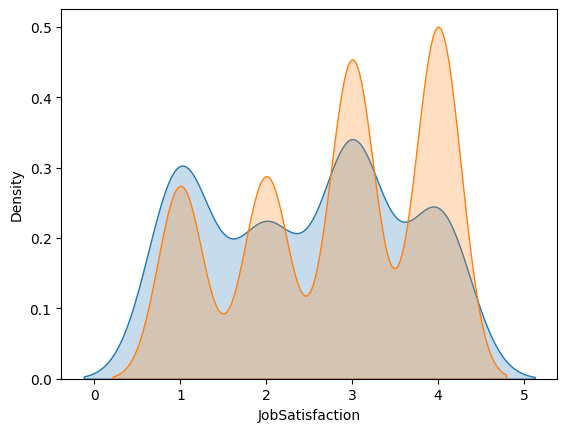

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


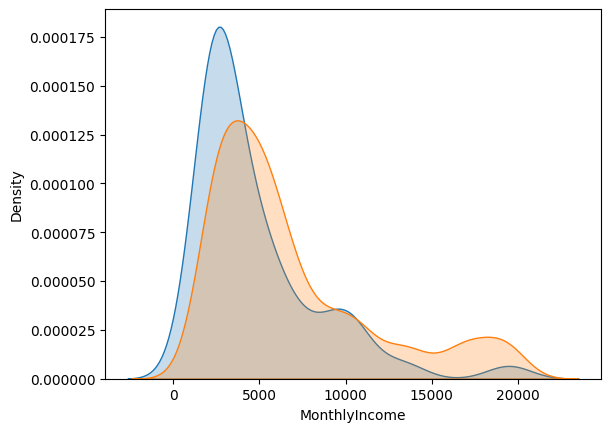

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


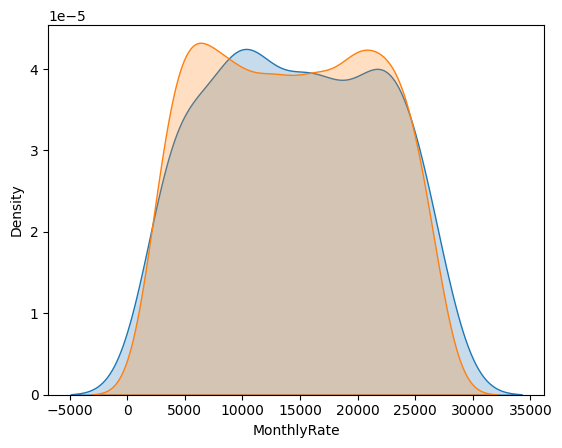

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


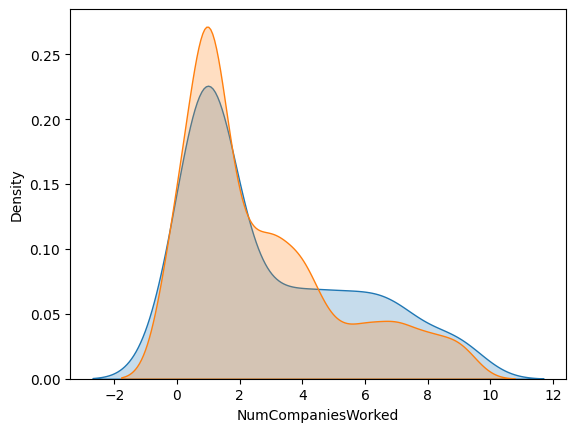

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


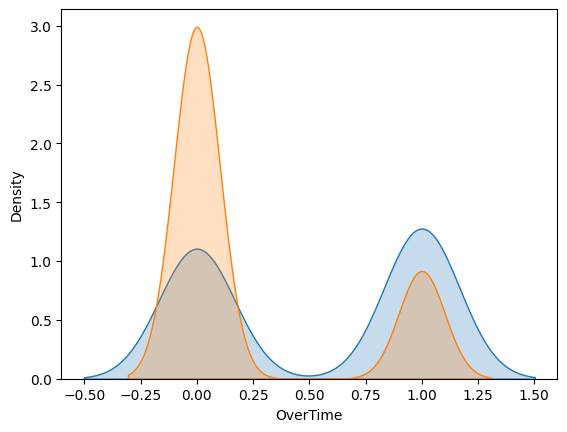

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


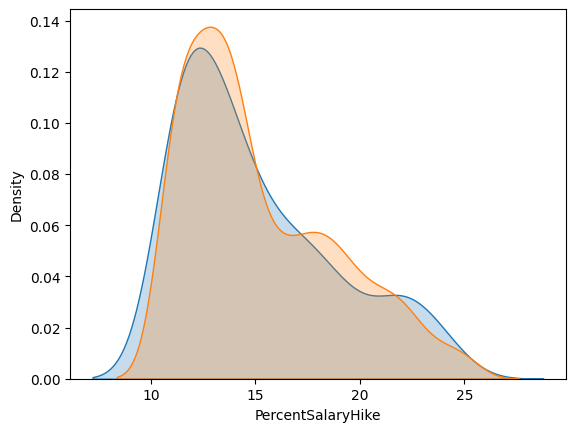

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


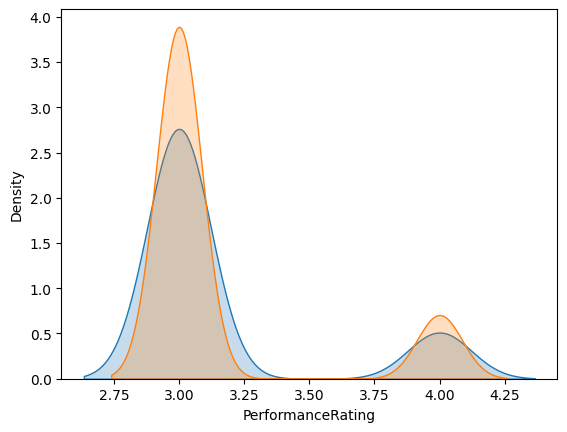

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


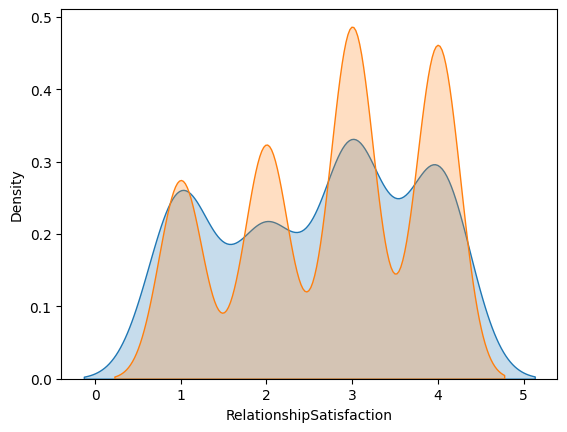

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


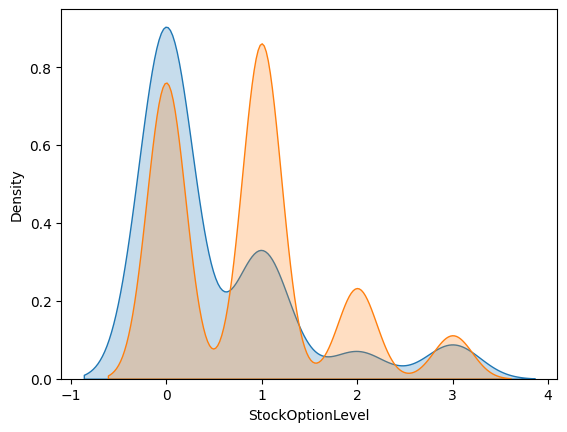

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


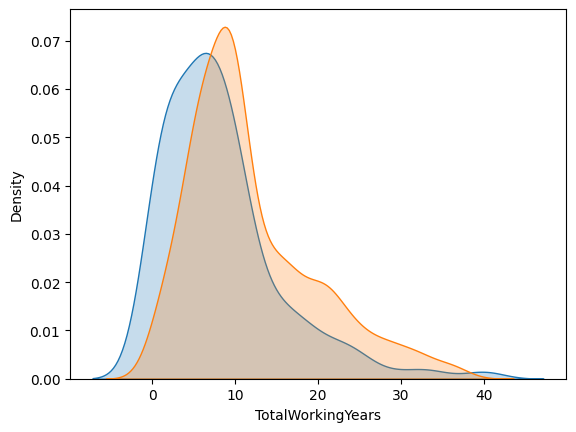

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


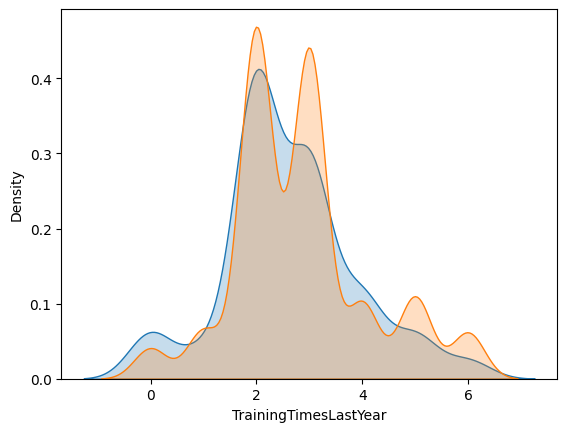

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


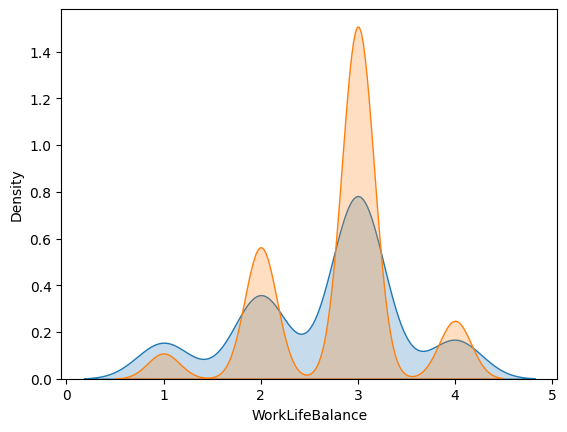

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


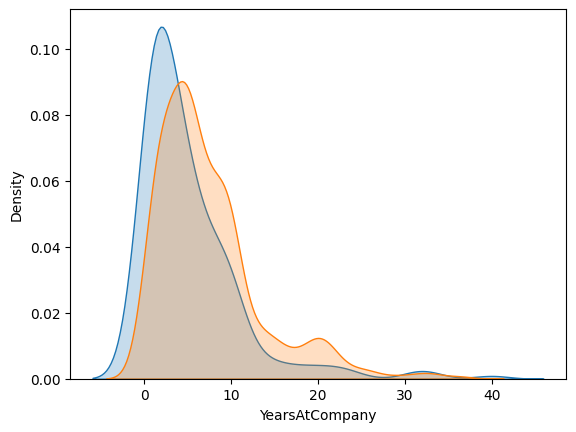

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


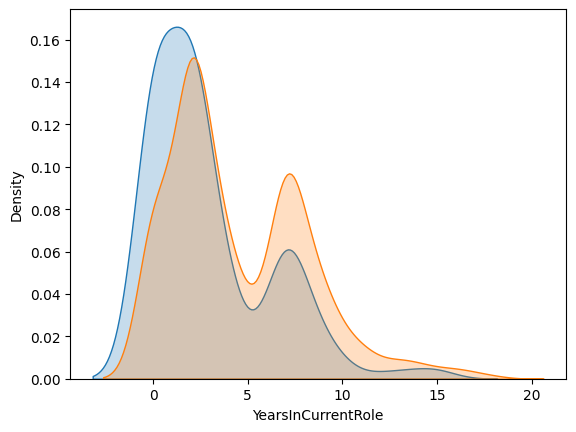

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


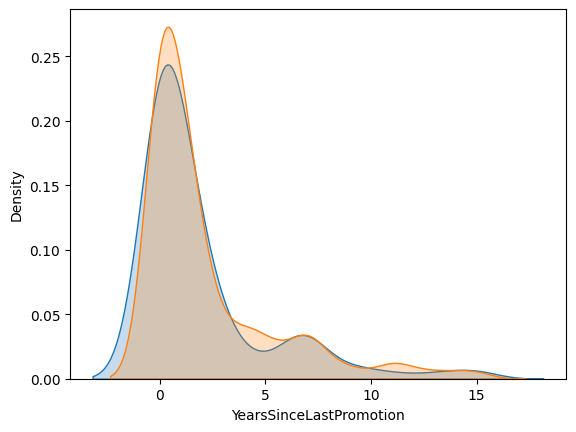

<ipython-input-16-174f4b4f84d2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
<ipython-input-16-174f4b4f84d2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)


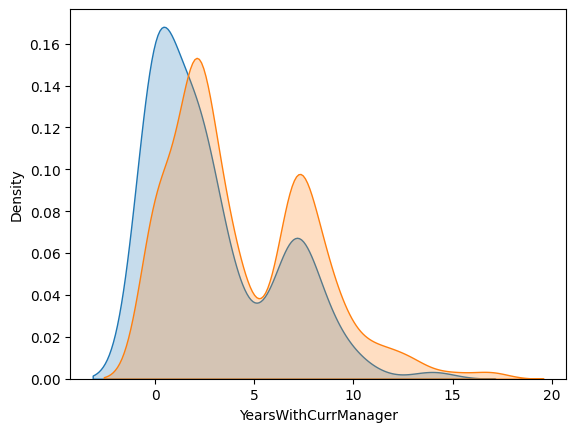

In [16]:
numerical_cols=df.select_dtypes('int').columns.tolist()
numerical_cols.remove('Attrition')
for col in numerical_cols:
  sns.kdeplot(data=df[df.Attrition==1],x=col,label='Left',shade=True)
  sns.kdeplot(data=df[df.Attrition==0],x=col,label='Stayed',shade=True)
  plt.show()

In [17]:
# numerical_cols=df.select_dtypes('int').columns.tolist()
# numerical_cols.remove('Attrition')
# df['Attrition_cat']=df['Attrition'].astype('string')
# for col in numerical_cols:
#   sns.kdeplot(data=df,x=col,hue='Attrition_cat',shade=True)
#   plt.show()

## Data Preparation

In [18]:
## One hot encoding for categorical columns

transformed_data=pd.get_dummies(df,columns=cat_cols)
transformed_data


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,1,0,0,1,0


In [19]:
Y=transformed_data['Attrition']
X=transformed_data.drop(['Attrition','Attrition_cat'],axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#sc=StandardScaler()
sc=MinMaxScaler()


X[numerical_cols]=sc.fit_transform(X[numerical_cols])
X.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0,0,0,0,0,1,0,0,0,1
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0,0,0,0,1,0,0,0,1,0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,1,0,0,0,0,0,0,0,0,1
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0,0,0,0,1,0,0,0,1,0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,1,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.75)

print(train_X.shape)
print(test_X.shape)

(1102, 50)
(368, 50)


## Machine Learning Models

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_curve, r2_score,ConfusionMatrixDisplay


In [33]:
models_performace=pd.DataFrame({'Model Name':[],'Accuracy':[],'F1 Score':[]})

Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.98      0.93       306
           1       0.80      0.39      0.52        62

    accuracy                           0.88       368
   macro avg       0.84      0.68      0.73       368
weighted avg       0.87      0.88      0.86       368

F1 score:  0.7267080745341615


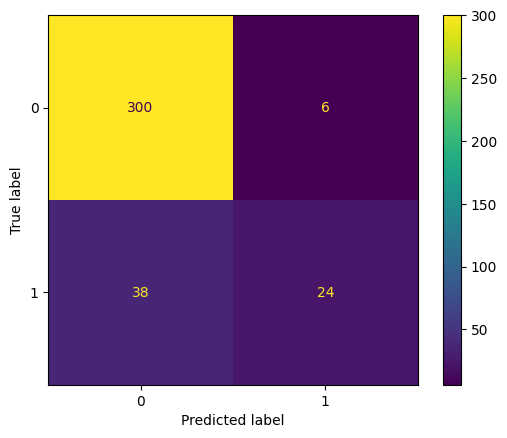

In [34]:
## Modeling

logistic_model=LogisticRegression()
logistic_model.fit(train_X,train_Y)
## Prediction
preds=logistic_model.predict(test_X)


## Evaluation

print ("Classification Report: \n\n", classification_report(test_Y,preds))
print ("F1 score: ",f1_score(test_Y,preds,average='macro'))
cm = confusion_matrix(test_Y, preds, labels=logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot()
models_performace.loc[len(models_performace)]=['Logistic Regression',accuracy_score(test_Y,preds),f1_score(test_Y,preds,average='macro')]

<Axes: ylabel='Feature'>

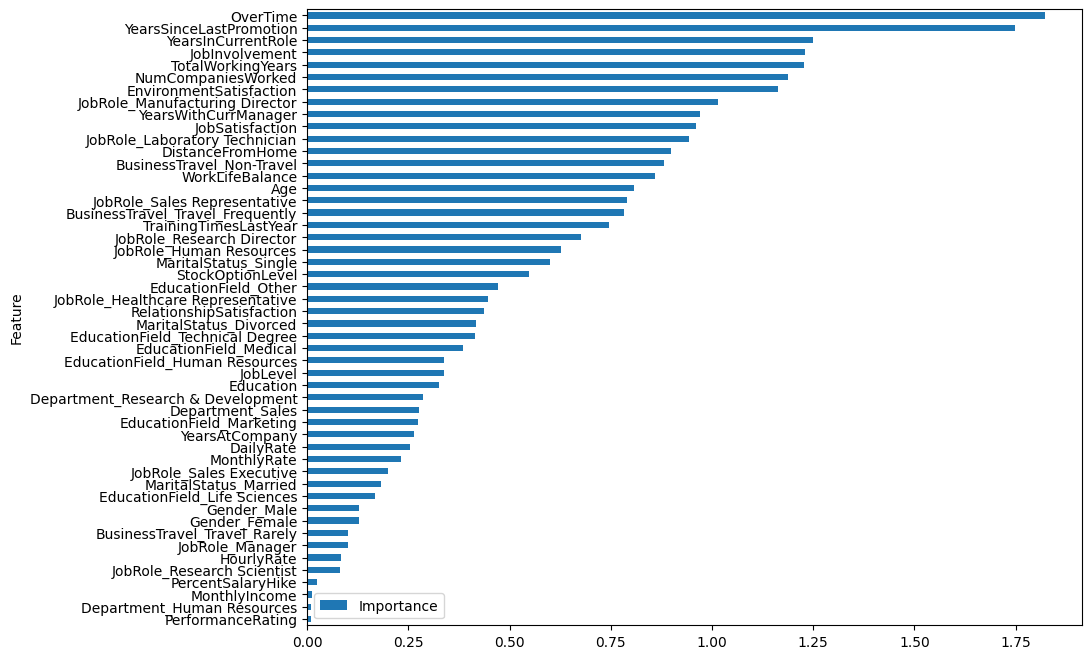

In [28]:
## Feature importance
coefficients = logistic_model.coef_[0]

feature_importance = pd.DataFrame({'Feature':X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 8))

In [36]:

classifiers={
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    "LightGBM": LGBMClassifier(random_state=42)}

for name, model in classifiers.items():
    model.fit(train_X,train_Y)
    preds=model.predict(test_X)
    print ("Model:",name,"\nF1 score: ",f1_score(test_Y,preds,average='macro'))
    print ("Classification Report: \n\n", classification_report(test_Y,preds))
    models_performace.loc[len(models_performace)]=[name,accuracy_score(test_Y,preds),f1_score(test_Y,preds,average='macro')]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: Random Forest 
F1 score:  0.6185007974481658
Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.99      0.92       306
           1       0.86      0.19      0.32        62

    accuracy                           0.86       368
   macro avg       0.86      0.59      0.62       368
weighted avg       0.86      0.86      0.82       368

Model: Linear SVM 
F1 score:  0.4540059347181009
Classification Report: 

               precision    recall  f1-score   support

           0       0.83      1.00      0.91       306
           1       0.00      0.00      0.00        62

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.69      0.83      0.76       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Model: RBF SVM 
F1 score:  0.4540059347181009
Classification Report: 

               precision    recall  f1-score   support

           0       0.83      1.00      0.91       306
           1       0.00      0.00      0.00        62

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.69      0.83      0.76       368

Model: Decision Tree 
F1 score:  0.6202270381836945
Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.96      0.91       306
           1       0.54      0.24      0.33        62

    accuracy                           0.84       368
   macro avg       0.70      0.60      0.62       368
weighted avg       0.81      0.84      0.81       368

Model: AdaBoost 
F1 score:  0.7267080745341615
Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.98      0.93       306
           1  

## Neural Networks

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model=Sequential()
model.add(Dense(units=500,activation='relu',input_shape=(50,)))
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               25500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
epochs_hist=model.fit(train_X,train_Y,epochs=100,batch_size=100)

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 0.4729 - accuracy: 0.8049
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3898 - accuracy: 0.8412
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3654 - accuracy: 0.8521
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3238 - accuracy: 0.8748
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3143 - accuracy: 0.8684
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 0.2853 - accuracy: 0.8929
Epoch 7/100
12/12 [==============================] - 0s 16ms/step - loss: 0.2595 - accuracy: 0.8984
Epoch 8/100
12/12 [==============================] - 0s 14ms/step - loss: 0.2302 - accuracy: 0.9147
Epoch 9/100
12/12 [==============================] - 0s 14ms/step - loss: 0.2065 - accuracy: 0.9283
Epoch 10/100
12/12 [==============================] - 0s 14ms/step - loss: 0.1902 - accuracy: 0.9201

In [39]:
preds=model.predict(test_X)
preds=(preds>0.5)
print ("Model: Sequential Neural Network","\nF1 score: ",f1_score(test_Y,preds,average='macro'))
print ("Classification Report: \n\n", classification_report(test_Y,preds))
models_performace.loc[len(models_performace)]=['Sequential NN',accuracy_score(test_Y,preds),f1_score(test_Y,preds,average='macro')]

12/12 [==============================] - 0s 3ms/step
Model: Sequential Neural Network 
F1 score:  0.6729398924144383
Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.94      0.91       306
           1       0.56      0.35      0.44        62

    accuracy                           0.85       368
   macro avg       0.72      0.65      0.67       368
weighted avg       0.83      0.85      0.83       368



In [41]:
models_performace

,Model Name,Accuracy,F1 Score
0,Logistic Regression,0.880435,0.726708
1,Random Forest,0.858696,0.618501
2,Linear SVM,0.831522,0.454006
3,RBF SVM,0.831522,0.454006
4,Decision Tree,0.836957,0.620227
5,AdaBoost,0.880435,0.726708
6,XGBoost,0.847826,0.645545
7,LightGBM,0.853261,0.637160
8,Sequential NN,0.845109,0.672940
